In [1]:
import warnings
import pandas            as pd
import numpy             as np
import seaborn           as sns
import scipy
import matplotlib.pyplot as plt 

from sklearn.utils import resample

In [2]:
# set params
warnings.filterwarnings("ignore")

## Example: Central Limit Theorem (the tendency of sample distributions to take normal distribution)

Histogram of annual incomes of 1,000 loan applicants (top), then 1,000 means of n=5 applicants (middle), and finally 1,000 means of n=20 applicants (bottom).

In [3]:
# load data
loans_income = pd.read_csv('data/loans_income.csv')

# select a sample of 1k
sample_data = loans_income.sample(1000, random_state=42).reset_index(drop=True)
sample_data['type'] = 'sample'

# select 1k means of 5
sample_mean_5 = pd.DataFrame([loans_income.sample(5).mean() for _ in range(1000)]).reset_index(drop=True)
sample_mean_5['type'] = 'mean_of_5'

# select 1k means of 20
sample_mean_20 = pd.DataFrame([loans_income.sample(20).mean() for _ in range(1000)]).reset_index(drop=True)
sample_mean_20['type'] = 'mean_of_20'

# concat results
results = pd.concat([sample_data, sample_mean_5, sample_mean_20], axis=0).reset_index(drop=True)

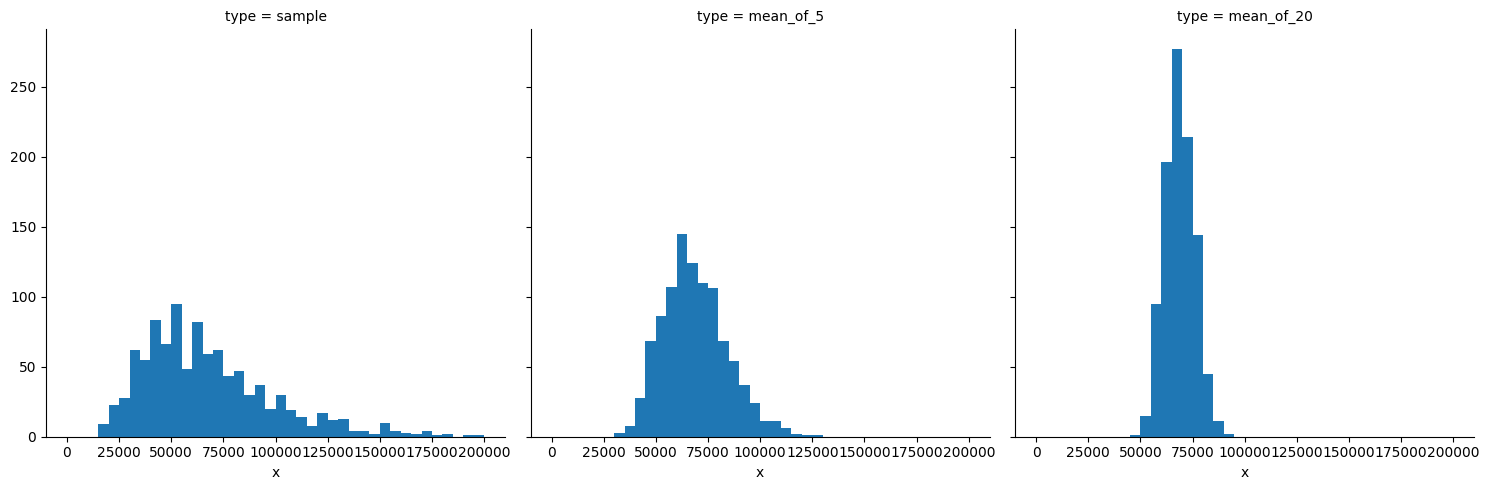

In [4]:
g = sns.FacetGrid(results, col='type', height=5)
g.map(plt.hist, 'x', range=[0, 200000], bins=40)
plt.show()

## Example:  The bootstrap to the median incomes of people taking out loans 

In [5]:
results = []

for i in range(1000):
    # draw resamples
    sample = resample(loans_income)

    # Take the median of each sample
    results.append(sample.median())

results = pd.Series(results)

In [6]:
print('Bootstap Statistics:\n')

print(f'original: {loans_income.median()[0]}')
print('----------------')
print(f'bias: {(results.mean() - loans_income.median())[0]}')
print('----------------')
print(f'std. error: {results.std()}')

Bootstap Statistics:

original: 62000.0
----------------
bias: -71.54499999999825
----------------
std. error: 215.99104751727003


## Bootstrap confidence interval for the annual income of loan applicants, based on a sample of 20

In [7]:
#n of iteractions
n_iterations = 1000

# list to store bootstap statistics
bs_stats = []

# run bootstrap and calculate statistics
for _ in range(n_iterations):
    sample = resample(loans_income)
    statistic = np.mean(sample)
    bs_stats.append(statistic)

# calculate confidence interval of 99%
ci = np.percentile(bs_stats, [0.5, 99.5])

print(f'Confidence Interval: {ci}')

Confidence Interval: [68382.6363547 69113.0834572]


90% - Confidence Interval: **[68511.13 - 69008.22]**    
95% - Confidence Interval: **[68464.46 - 69025.38]**    
99% - Confidence Interval: **[68358.95 - 69169.86]**    

## QQ Plot - Normal Distribution

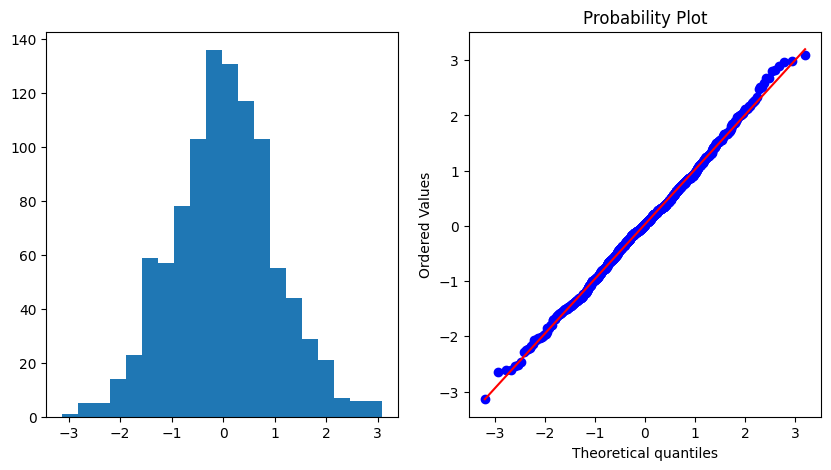

In [8]:
fig, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

# create a normal distribuition
norm_sample = scipy.stats.norm.rvs(size=1000)

# plot distribution
axs[0].hist(norm_sample, bins=20)

# qq plot
scipy.stats.probplot(norm_sample, plot=axs[1])

plt.show()

All ordered values (y=axis), is the z-score (value - mean)/standard deviation

## QQ Plot - Long Tailed Distribution

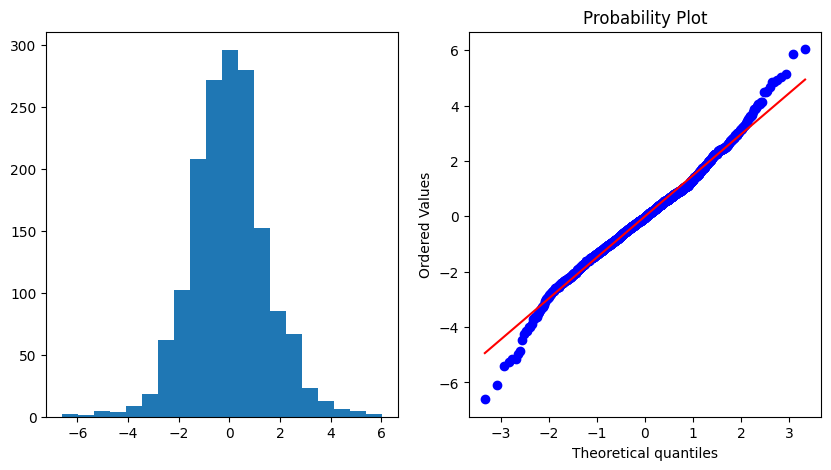

In [9]:
# load data
sp500 = pd.read_csv('data/sp500_data.csv')

# Select netflix data
nflx = sp500['NFLX'][sp500['NFLX'] > 0]
nflx = np.diff(np.log(nflx))

# set figure
fig, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

# plot distribution
axs[0].hist(nflx, bins=20)

# qq plot
scipy.stats.probplot(nflx, plot=axs[1])

plt.show()

## Binomial Distribution

If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [10]:
# probability mass function
r = scipy.stats.binom.pmf(0, n=200, p=0.02)
print(f'The probaility is: {round(r*100, 2)}%')

The probaility is: 1.76%


In [11]:
# cumulative distribution function
r = scipy.stats.binom.cdf(0, n=200, p=0.02)
print(f'The probaility is: {round(r*100, 2)}%')

The probaility is: 1.76%


The difference between PMF and CDF is:  

- **PMF**: The probability of obtaining success in a exact amount of times.   
- **CDF**: The probability of obtaining success in a number equal our smaller a certain amount of times

## Poisson Distribution

In [13]:
# generate 100 random numbers with an average=5
scipy.stats.poisson.rvs(5, size=100)

array([4, 5, 1, 2, 2, 2, 2, 4, 1, 0, 2, 1, 1, 0, 1, 1, 4, 0, 0, 1, 1, 0,
       5, 4, 3, 1, 1, 1, 3, 0, 3, 1, 3, 3, 3, 2, 5, 2, 2, 0, 3, 1, 2, 1,
       2, 1, 1, 2, 3, 0, 2, 1, 3, 1, 2, 5, 0, 2, 0, 2, 4, 3, 1, 3, 2, 0,
       1, 2, 4, 2, 2, 0, 0, 2, 2, 4, 1, 2, 1, 0, 0, 1, 3, 1, 5, 2, 2, 2,
       0, 3, 1, 3, 3, 4, 4, 1, 1, 5, 5, 4])

In [27]:
# for a lambda = 5, what is the probability of obtaining 3 events
lamb = 5

# pmf
value1 = 3
scipy.stats.poisson.pmf(lamb, value1)

0.10081881344492458

In [32]:
# for a lambda = 5, what is the probability of obtaining 5 or less events
# cdf
value2 = 5
scipy.stats.poisson.pmf(lamb, value2)

0.17546736976785068